On a : $
    \dot{x_1} = x_1 \times (\alpha - \beta \times x_2)
    $.
Ainsi, dans ce modèle, le nombre de proies dépend de la croissance de la population de proies $\alpha \times x_1$ avec $\alpha$ le taux de reproduction des proies (nourriture considérée illimitée), et le danger lié aux prédateurs $- \beta \times x_1 \times x_2$ avec $\beta$ le taux de prédation. Plus il y a de prédateurs (plus $x_2$ est grand), moins il y aura de proies, d'où le signe $-$.

De même, on a : $\dot{x_2} = - x_2 \times (\gamma - \delta \times x_1)$. Ainsi, on a $\gamma$ le taux de mortalité naturelle des prédateurs. Le nombre de prédateurs dépend aussi de la croissance de la population de prédateurs $\delta \times x_1 \times x_2$, qui dépend de la quantité de nourriture, soit le nombre $x_1$ de proies.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def display(f, x, y):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    plt.quiver(X, Y, Z[0], Z[1])
    plt.streamplot(X, Y, Z[0], Z[1])

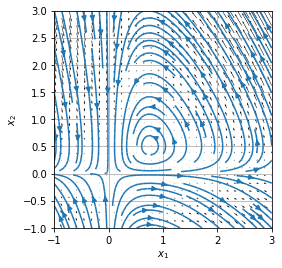

In [22]:
alpha, beta, gamma, delta = 1, 2, 3, 4

def f(x, y):
    return (x*(alpha - beta*y), -y*(gamma - delta*x))

x = np.linspace(-1, 3, 30)
y = np.linspace(-1, 3, 30)

display(f, x, y)

In [41]:
from math import log

def H(x, y):
    return (delta*x - gamma*log(x) + beta*y - alpha*log(y))

import autograd
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

a = 3.
b = 4.
print(grad(H)(x, y))
#grad(H)(a, b)[0] == delta - gamma/a
#grad(H)(a, b)[1] == np.array([delta - gamma/a, beta - alpha/b])[1]

TypeError: must be real number, not ArrayBox

In [42]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

display_contour(H, np.array(x), np.array(y), 10)

TypeError: only size-1 arrays can be converted to Python scalars

In [72]:
def solve_euler_explicite(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    while t0 < tf:
        x1 = x0 + dt * f(x0)
        x.append(x1)
        x0 = x1
        t0 += dt
        t.append(t0)
    return np.array(t), np.array(x)

In [73]:
solve_euler_explicite(lambda x : 3*x, 0.5, 1, 0, 10)

TypeError: <lambda>() argument after * must be an iterable, not float

In [74]:
solve_euler_explicite(f, (1, 2), 1, 0, 10)

TypeError: f() takes 2 positional arguments but 4 were given

In [62]:
def solve_euler_implicite(f, x0, dt, t0, tf, itermax = 100):
    t = [t0]
    x = [x0]
    while t0 < tf:
        x1 = x0 + dt*f(x0)
        def F(x):
            return x0 + dt*f(x)
        for i in range(itermax):
            x1 = F(x1)
        x.append(x1)
        x0 = x1
        t0 += dt
        t.append(t0)
    return np.array(t), np.array(x)

In [63]:
solve_euler_implicite(lambda x : 3*x, 0.5, 1, 0, 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([5.00000000e-001, 1.15959942e+048, 2.68934164e+096, 6.23711801e+144,
        1.44651169e+193, 3.35474823e+241, 7.78032823e+289,             inf,
                    inf,             inf,             inf]))